In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import folium
from folium.plugins import MarkerCluster

In [3]:
df = pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding='latin1')

In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2909 entries, 0 to 2908
Columns: 135 entries, eventid to related
dtypes: float64(62), int64(22), object(51)
memory usage: 3.0+ MB


In [6]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,2.909000e+03,2909.000000,2909.000000,2909.000000,2909.000000,2909.000000,2909.000000,2861.000000,2861.000000,2909.000000,...,8.900000e+01,1.0,3.400000e+01,0.0,161.000000,115.000000,2908.000000,2908.000000,2908.000000,2908.000000
mean,1.972186e+11,1972.122723,6.138536,15.382606,0.032314,294.377106,5.131317,35.713904,-35.403239,1.088003,...,1.531135e+06,20000.0,2.518029e+06,NaN,2.782609,9.852174,-3.232462,-3.148900,0.527510,-1.452545
std,1.584058e+08,1.585828,3.421309,9.095383,0.176862,208.206269,3.510636,24.617529,53.617887,0.563527,...,6.758437e+06,NaN,7.441265e+06,NaN,1.283042,35.175561,4.454597,4.530162,0.682676,4.129835
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-43.532054,-157.818968,1.000000,...,0.000000e+00,20000.0,0.000000e+00,NaN,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.971022e+11,1971.000000,3.000000,7.000000,0.000000,185.000000,1.000000,34.097866,-75.135490,1.000000,...,0.000000e+00,20000.0,2.875000e+04,NaN,2.000000,1.000000,-9.000000,-9.000000,0.000000,0.000000
50%,1.972083e+11,1972.000000,6.000000,16.000000,0.000000,217.000000,8.000000,40.697132,-7.312045,1.000000,...,8.000000e+04,20000.0,1.050000e+05,NaN,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,1.974011e+11,1974.000000,9.000000,23.000000,0.000000,603.000000,8.000000,54.183052,-1.977903,1.000000,...,8.000000e+05,20000.0,1.000000e+06,NaN,4.000000,1.500000,0.000000,0.000000,1.000000,1.000000
max,1.975033e+11,1975.000000,12.000000,31.000000,1.000000,605.000000,12.000000,59.332788,172.636225,5.000000,...,6.100000e+07,20000.0,4.100000e+07,NaN,7.000000,187.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.corr()

<ipython-input-7-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999766,-0.041334,-0.004233,-0.001713,0.117312,0.367269,-0.004154,0.323438,0.004678,...,0.209482,NaN,0.193228,NaN,0.168462,-0.213825,0.254893,0.246720,0.245636,0.387993
iyear,0.999766,1.000000,-0.062903,-0.006332,-0.001883,0.115208,0.364933,-0.003970,0.321162,0.004842,...,0.205710,NaN,0.185691,NaN,0.165455,-0.213912,0.251870,0.243713,0.242621,0.383910
imonth,-0.041334,-0.062903,1.000000,0.070656,0.007375,0.088699,0.088642,-0.008822,0.088028,-0.009001,...,0.176769,NaN,0.309854,NaN,0.134117,0.012154,0.125614,0.125340,0.125750,0.168829
iday,-0.004233,-0.006332,0.070656,1.000000,0.012406,0.050678,-0.011084,-0.019924,-0.006608,0.008658,...,0.002365,NaN,0.078063,NaN,0.079504,-0.090077,0.064389,0.062931,0.037910,0.058803
extended,-0.001713,-0.001883,0.007375,0.012406,1.000000,-0.166557,0.005902,-0.202557,0.019724,0.099119,...,-0.119802,NaN,-0.206405,NaN,-0.356351,-0.002907,0.073713,0.090575,0.046757,0.076537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nreleased,-0.213825,-0.213912,0.012154,-0.090077,-0.002907,0.117305,0.204430,0.276445,0.301621,-0.063805,...,0.037592,NaN,0.040501,NaN,-0.186459,1.000000,0.053205,0.063586,0.050943,0.005117
INT_LOG,0.254893,0.251870,0.125614,0.064389,0.073713,0.197770,0.276623,0.037426,0.217182,0.069672,...,0.002465,NaN,-0.055565,NaN,0.033493,0.053205,1.000000,0.994510,0.209788,0.686360
INT_IDEO,0.246720,0.243713,0.125340,0.062931,0.090575,0.166570,0.270619,0.014862,0.215789,0.075867,...,-0.004184,NaN,-0.037845,NaN,0.011683,0.063586,0.994510,1.000000,0.231295,0.689179
INT_MISC,0.245636,0.242621,0.125750,0.037910,0.046757,0.349166,0.475327,0.140390,0.436877,0.039299,...,-0.020928,NaN,0.031704,NaN,0.007399,0.050943,0.209788,0.231295,1.000000,0.535907


In [8]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

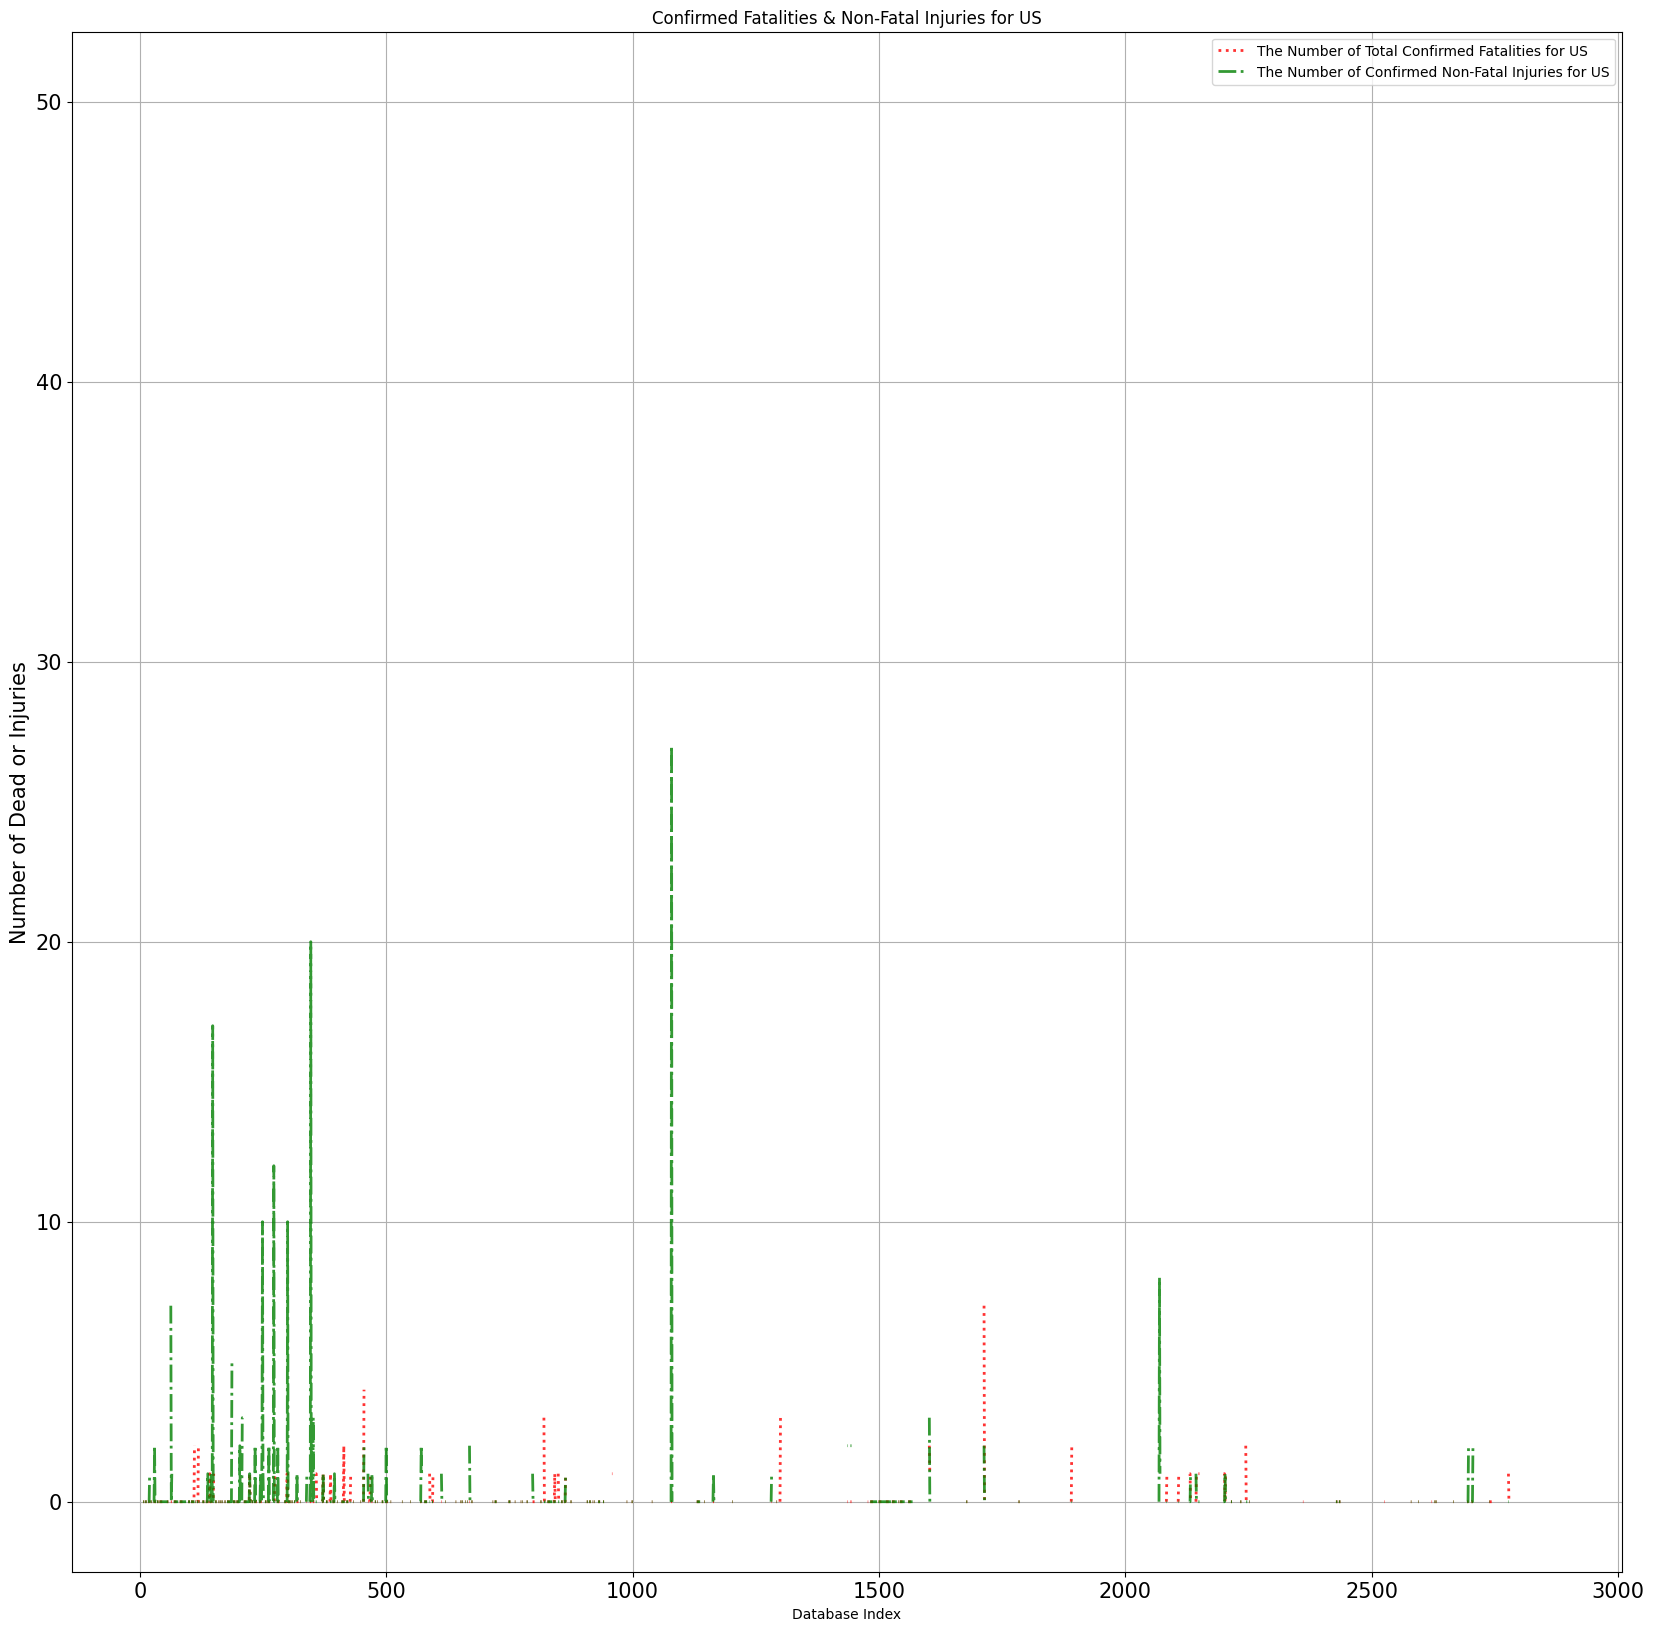

In [9]:
df.nkillus.plot(kind = 'line', color = 'red', label = 'The Number of Total Confirmed Fatalities for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (20,20), fontsize=15)
df.nwoundus.plot(color = "green", label = 'The Number of Confirmed Non-Fatal Injuries for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = '-.', figsize = (20,20), fontsize=15)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=10)              # label = name of label
plt.ylabel('Number of Dead or Injuries', fontsize=15)

plt.title('Confirmed Fatalities & Non-Fatal Injuries for US')            #plot title
plt.show()

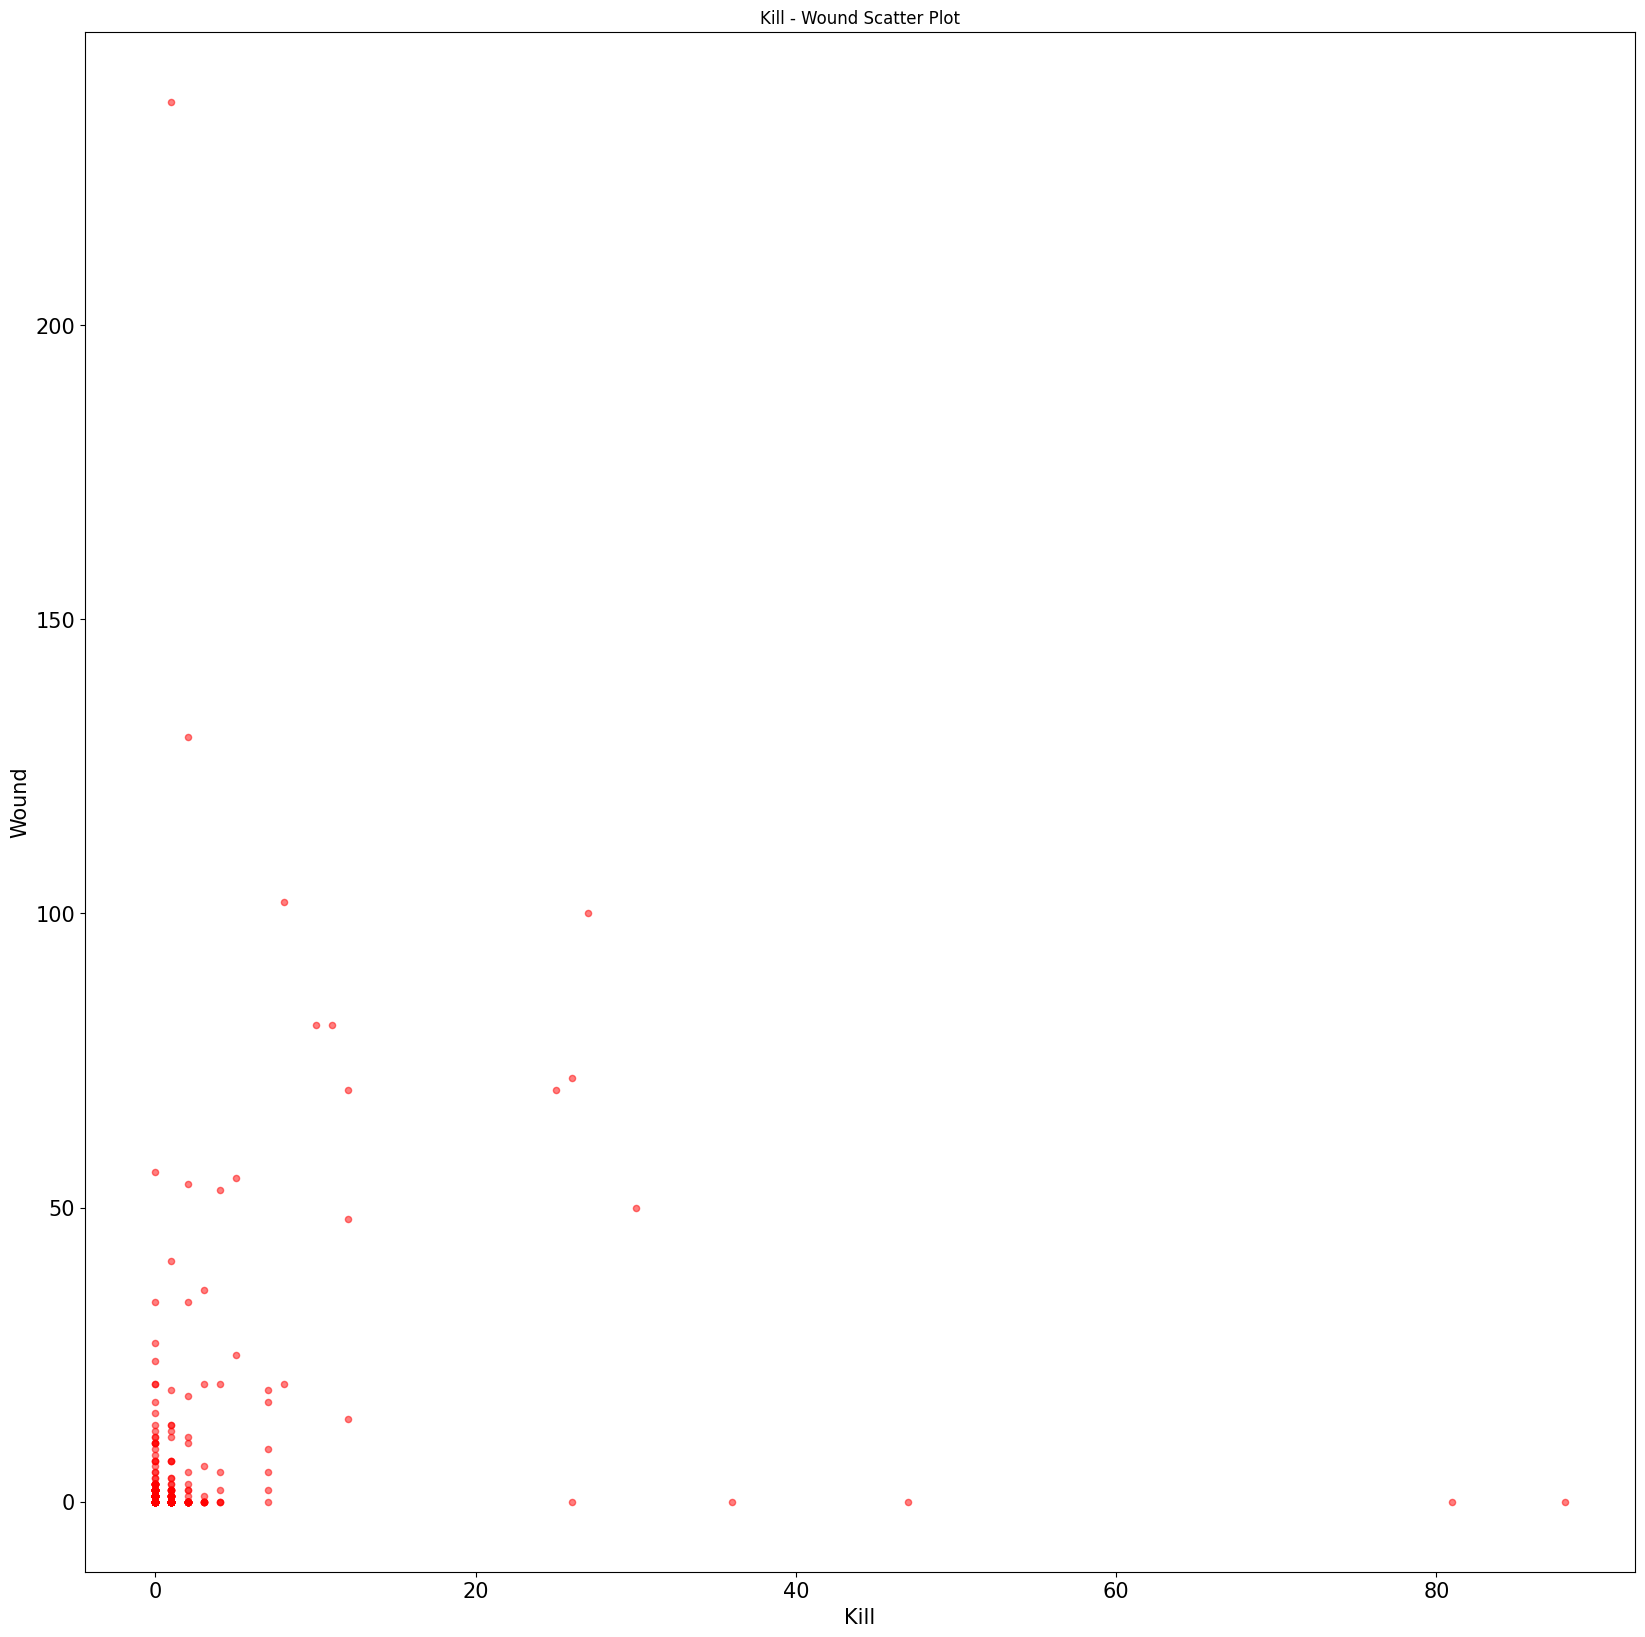

In [10]:
df.plot(kind = 'scatter', x = 'nkill', y = 'nwound', alpha = 0.5, color = 'red', figsize = (20,20), fontsize=15)
plt.xlabel('Kill', fontsize=15)
plt.ylabel('Wound', fontsize=15)
plt.title('Kill - Wound Scatter Plot')
plt.show()

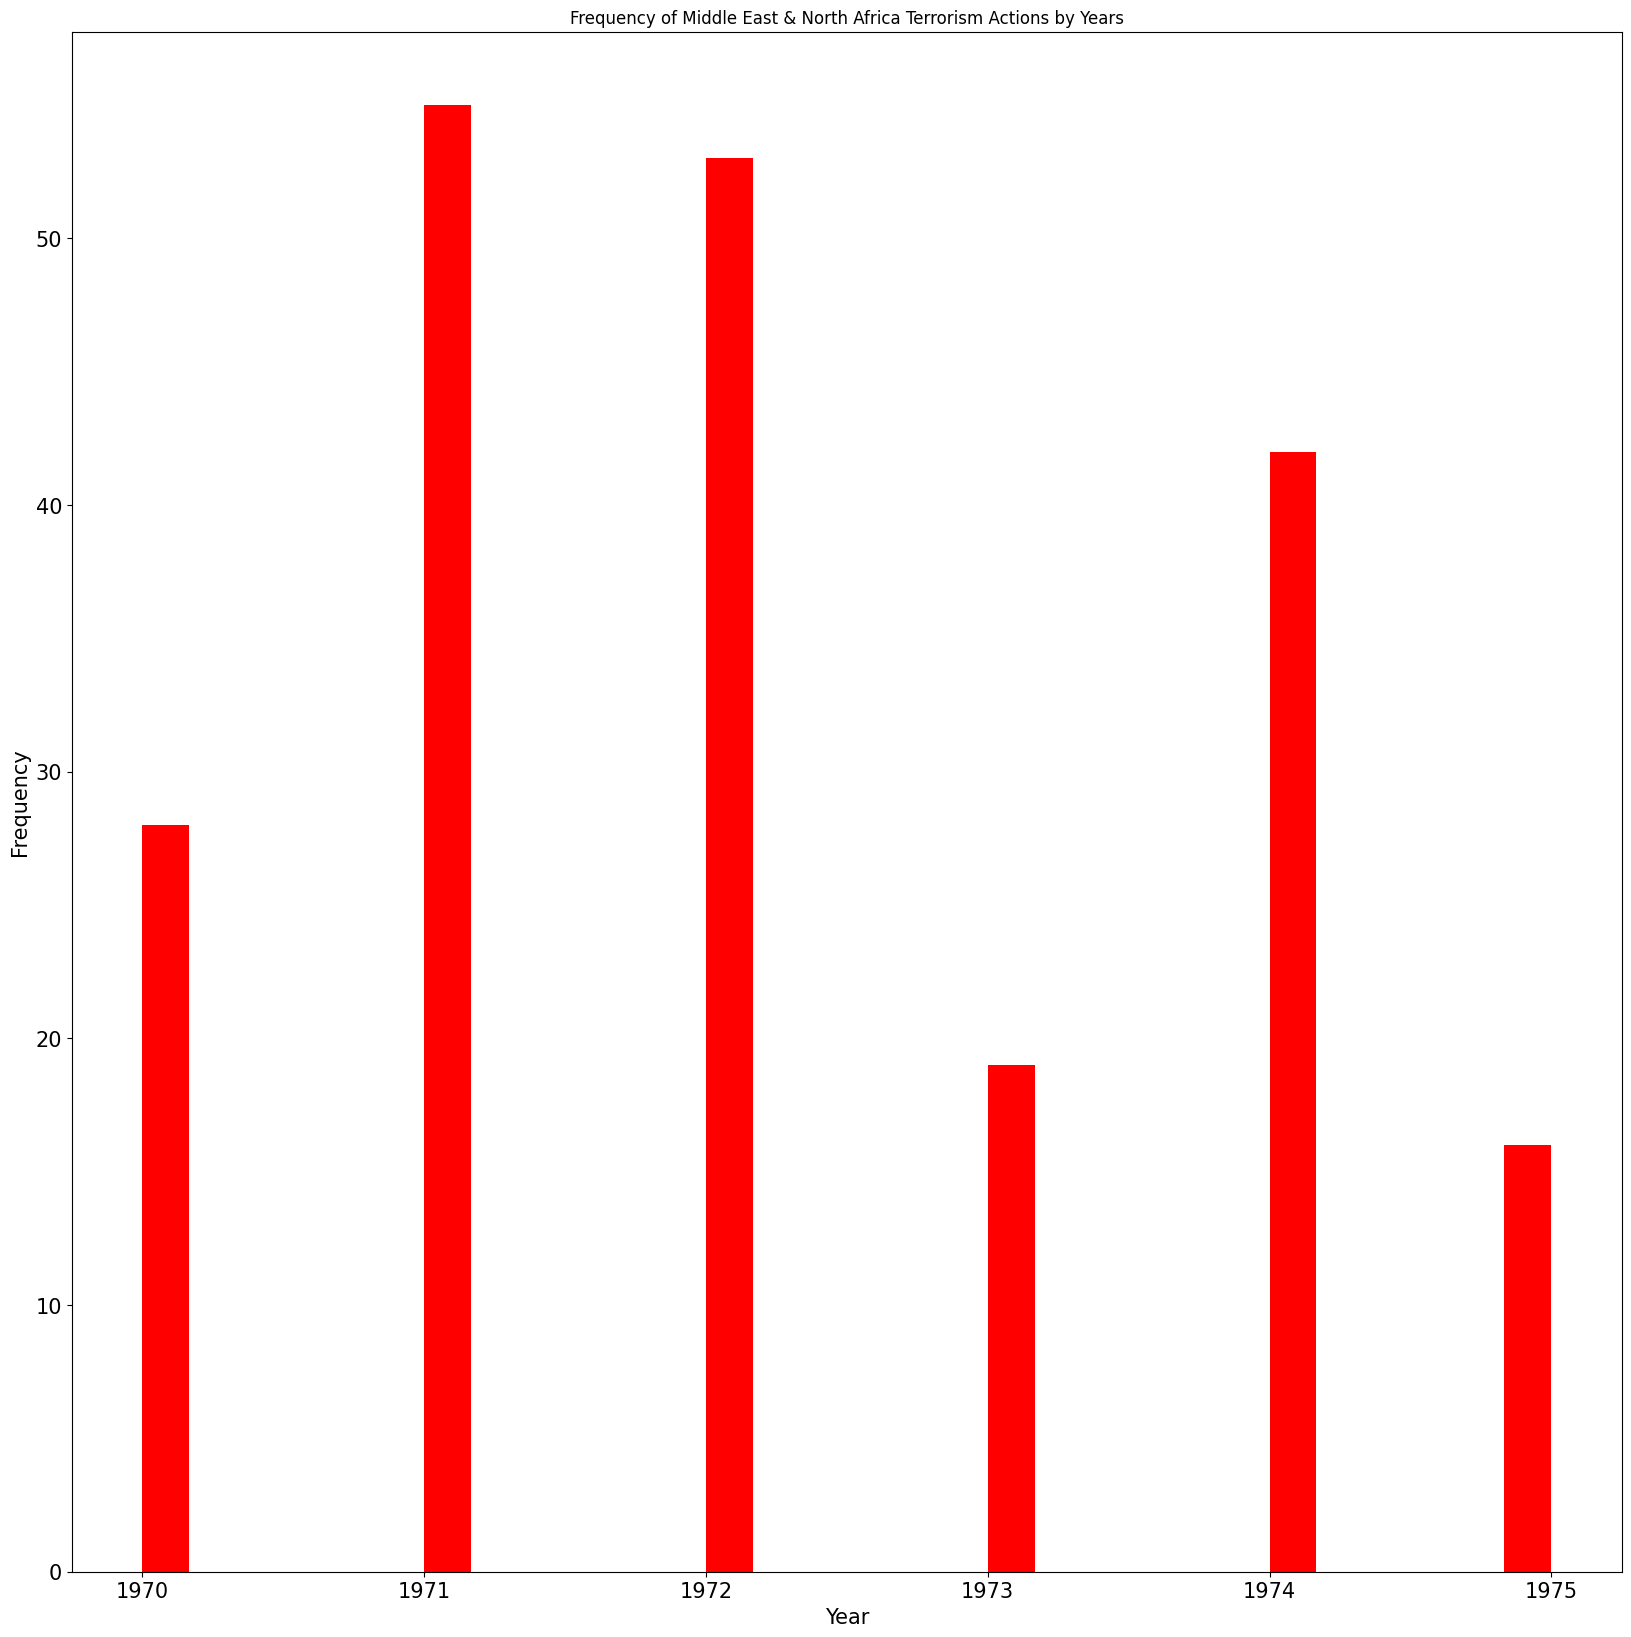

In [11]:
middleEastData = df[df['region'] == 10]
middleEastData.iyear.plot(kind = 'hist', bins = 30, figsize = (20,20), color = 'red', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Frequency of Middle East & North Africa Terrorism Actions by Years')
plt.show()

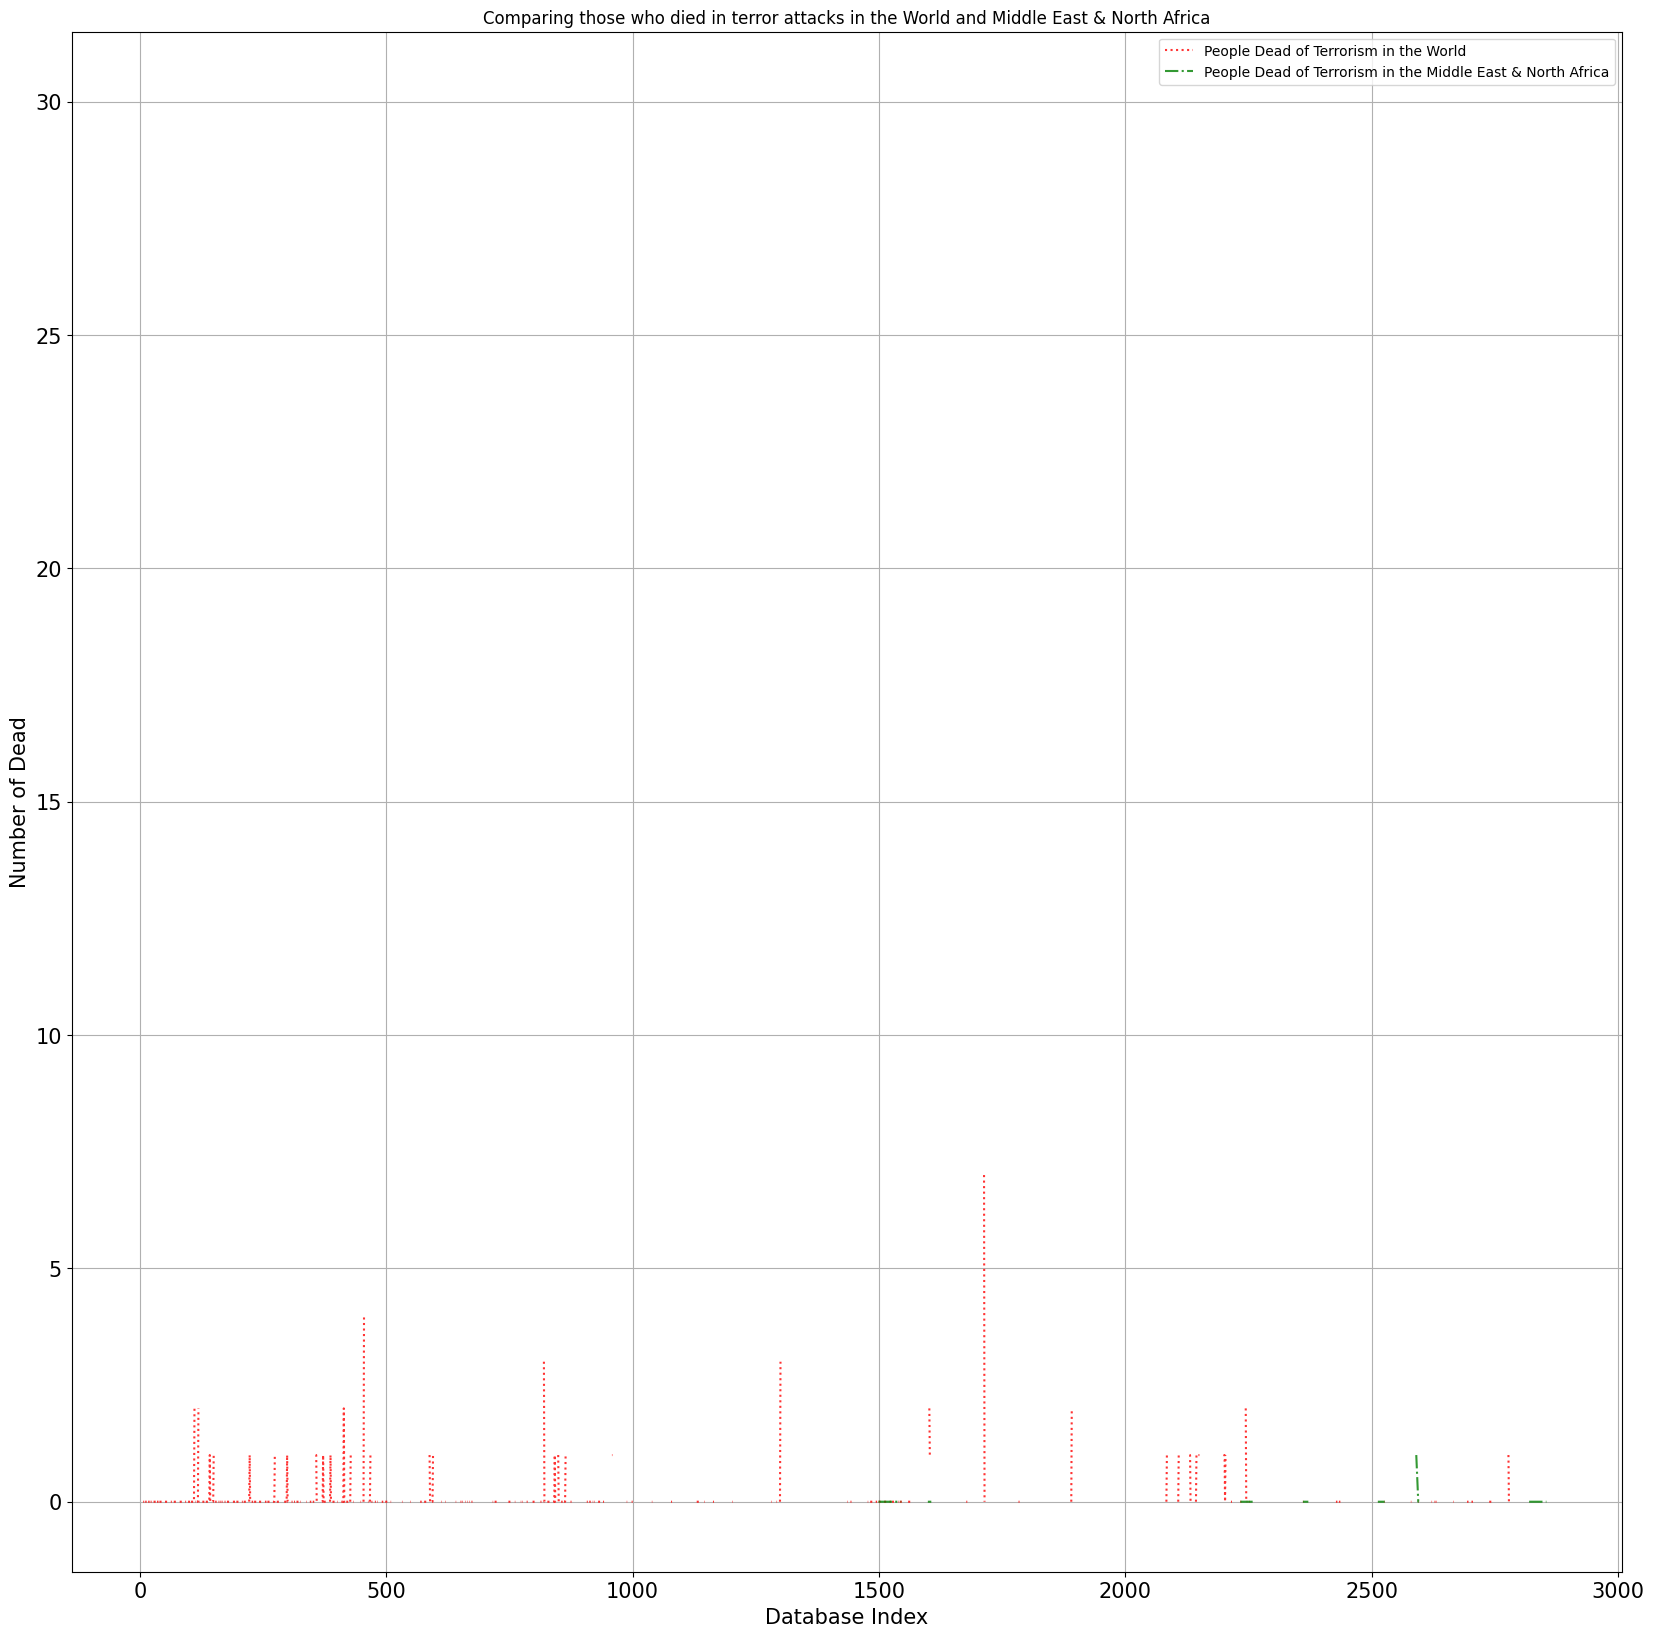

In [12]:
df.nkillus.plot(kind = 'line', color = 'red', label = 'People Dead of Terrorism in the World', linewidth = 1.5, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (20,20), fontsize=15)
middleEastData.nkillus.plot(color = "green", label = 'People Dead of Terrorism in the Middle East & North Africa', linewidth = 1.5, alpha = 0.8, 
                            grid = True, linestyle = '-.', figsize = (20,20), fontsize=15)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=15)              # label = name of label
plt.ylabel('Number of Dead', fontsize=15)

plt.title('Comparing those who died in terror attacks in the World and Middle East & North Africa')            #plot title
plt.show()

In [13]:
filterYear = df['iyear'] == 1970

In [14]:
filterData = df[filterYear] # filter data
# filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
# reqFilterDataList
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]], popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

In [15]:
killData = df.loc[:,'nkill']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 1927


In [16]:
attackData = df.loc[:,'attacktype1':'attacktype1_txt']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)

In [17]:
typeKillFormatData = typeKillData.pivot_table(columns='attacktype1_txt', values='nkill', aggfunc='sum')
typeKillFormatData

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
nkill,191.0,661.0,865.0,11.0,41.0,91.0,50.0,1.0,16.0


In [18]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Armed Assault                        1 non-null      float64
 1   Assassination                        1 non-null      float64
 2   Bombing/Explosion                    1 non-null      float64
 3   Facility/Infrastructure Attack       1 non-null      float64
 4   Hijacking                            1 non-null      float64
 5   Hostage Taking (Barricade Incident)  1 non-null      float64
 6   Hostage Taking (Kidnapping)          1 non-null      float64
 7   Unarmed Assault                      1 non-null      float64
 8   Unknown                              1 non-null      float64
dtypes: float64(9)
memory usage: 80.0+ bytes


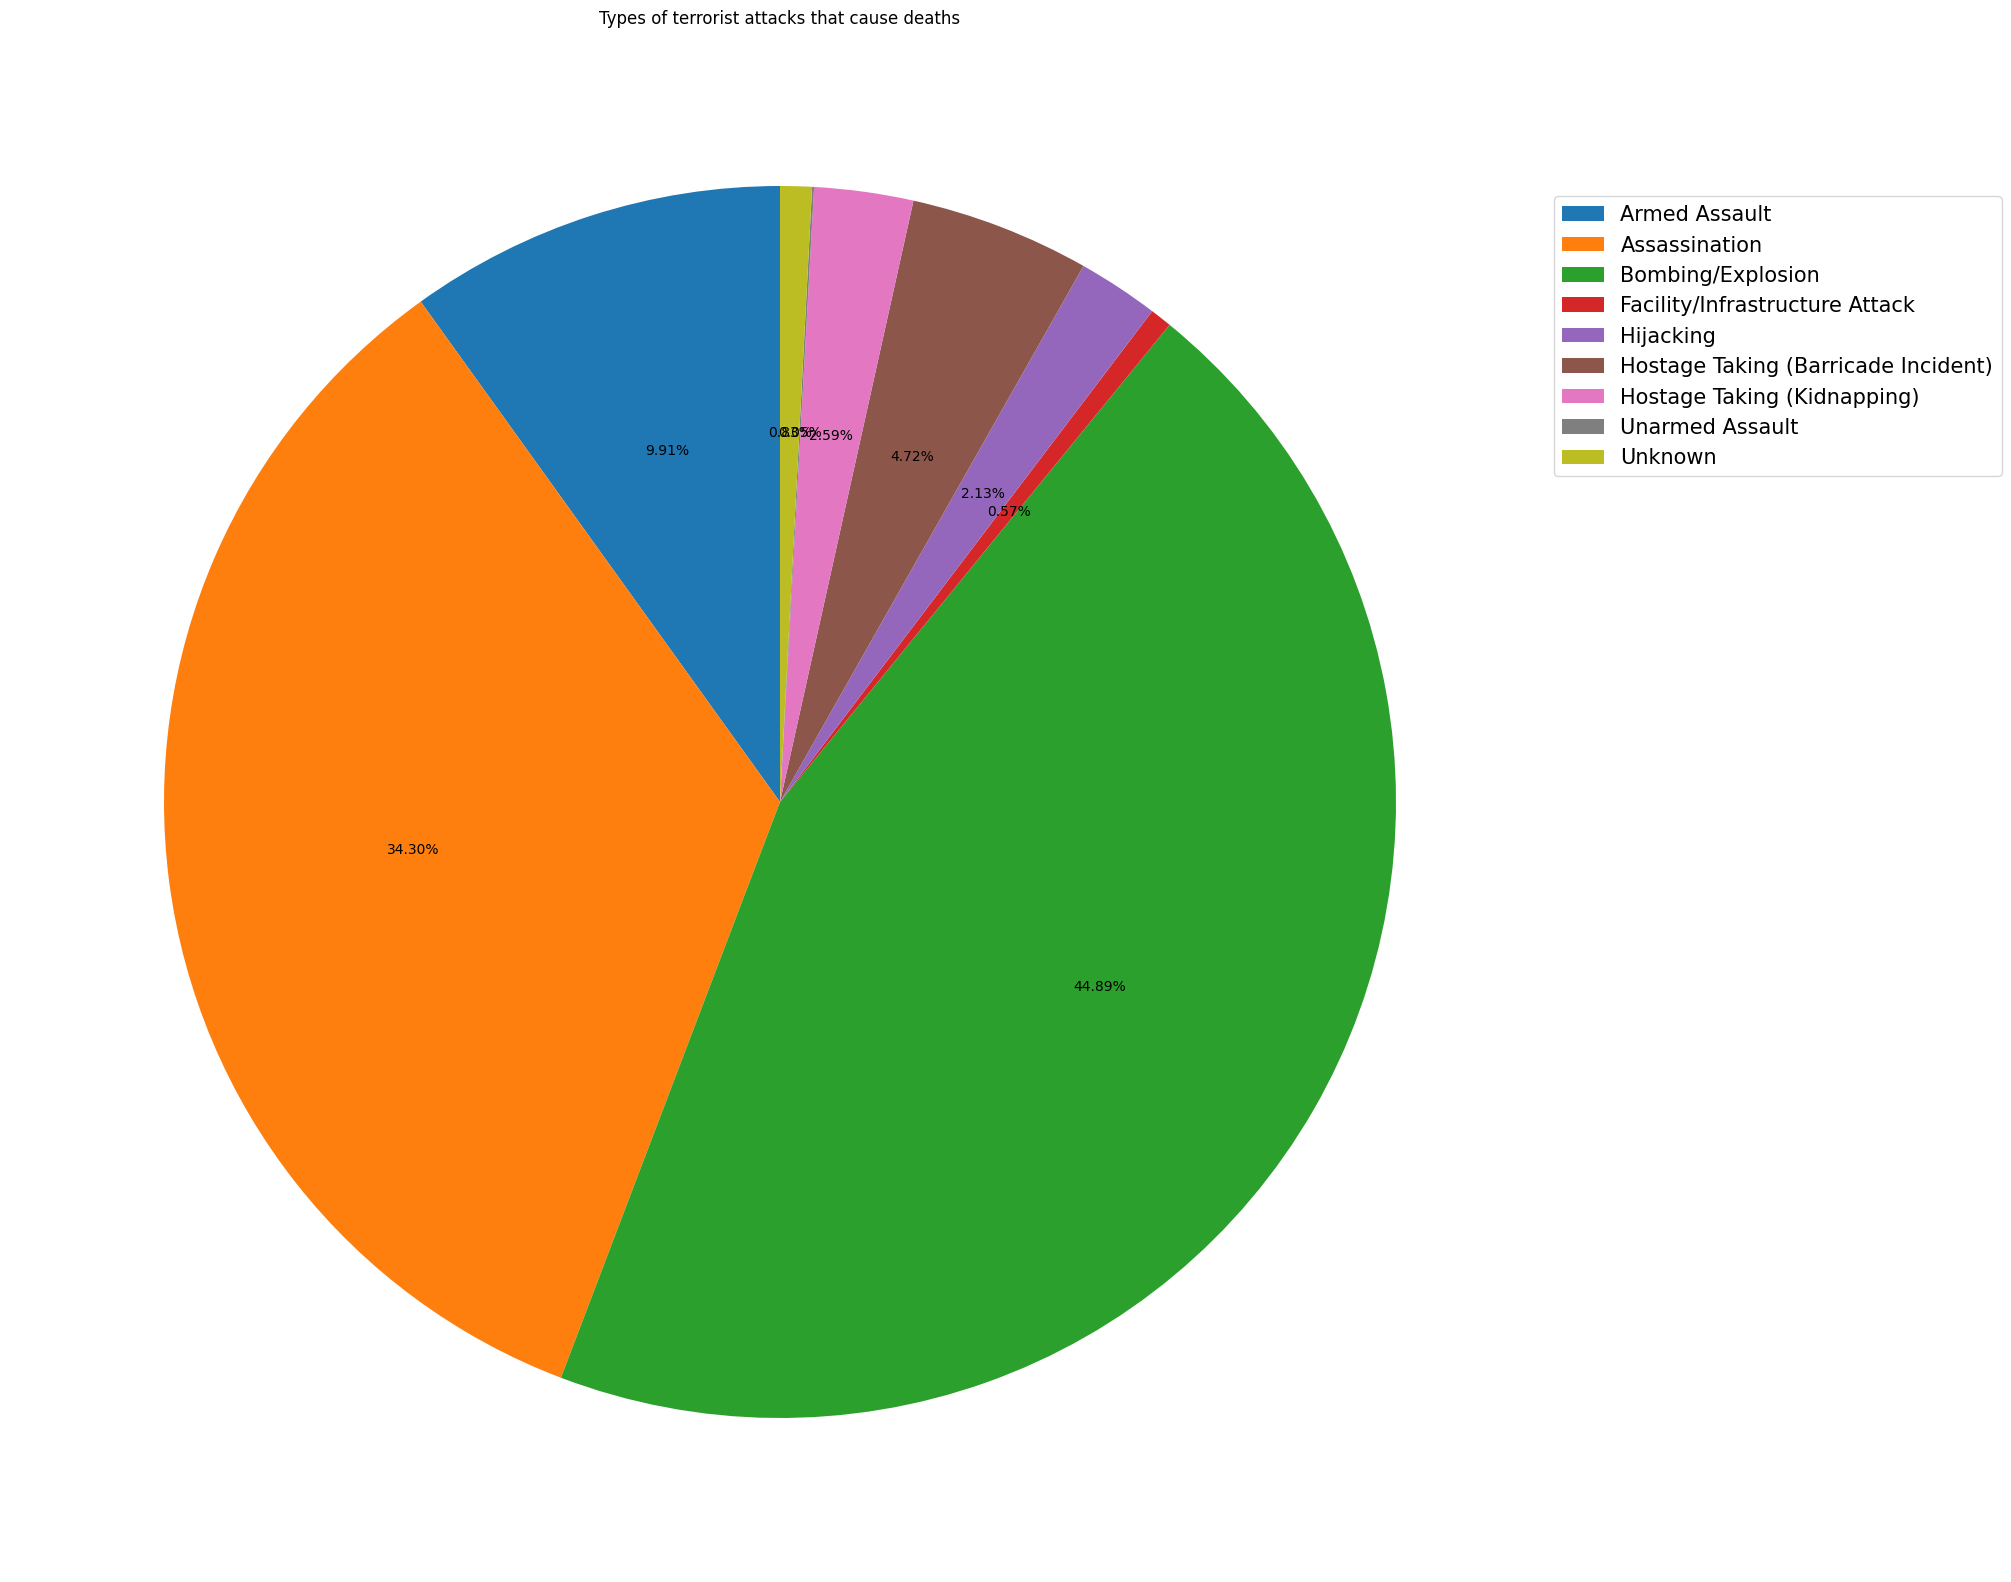

In [19]:
labels = typeKillFormatData.columns.tolist()
transpoze = typeKillFormatData.T
values = transpoze.values.flatten().tolist()
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%')
plt.title('Types of terrorist attacks that cause deaths')
plt.legend(labels, loc='upper right', bbox_to_anchor=(1.3, 0.9), fontsize=15)
plt.show()

In [20]:
countryData = df.loc[:,'country':'country_txt']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [21]:
countryKillFormatData = countryKillData.pivot_table(columns='country_txt', values='nkill', aggfunc='sum')
countryKillFormatData

country_txt,Afghanistan,Algeria,Andorra,Argentina,Australia,Austria,Belgium,Bolivia,Botswana,Brazil,...,United Arab Emirates,United Kingdom,United States,Uruguay,Venezuela,West Bank and Gaza Strip,West Germany (FRG),Yugoslavia,Zaire,Zambia
nkill,0.0,0.0,0.0,54.0,1.0,4.0,0.0,0.0,1.0,2.0,...,1.0,981.0,131.0,4.0,0.0,1.0,33.0,1.0,0.0,4.0


In [22]:
countryKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Data columns (total 82 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Afghanistan                     1 non-null      float64
 1   Algeria                         1 non-null      float64
 2   Andorra                         1 non-null      float64
 3   Argentina                       1 non-null      float64
 4   Australia                       1 non-null      float64
 5   Austria                         1 non-null      float64
 6   Belgium                         1 non-null      float64
 7   Bolivia                         1 non-null      float64
 8   Botswana                        1 non-null      float64
 9   Brazil                          1 non-null      float64
 10  Brunei                          1 non-null      float64
 11  Cambodia                        1 non-null      float64
 12  Canada                          1 non

In [23]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

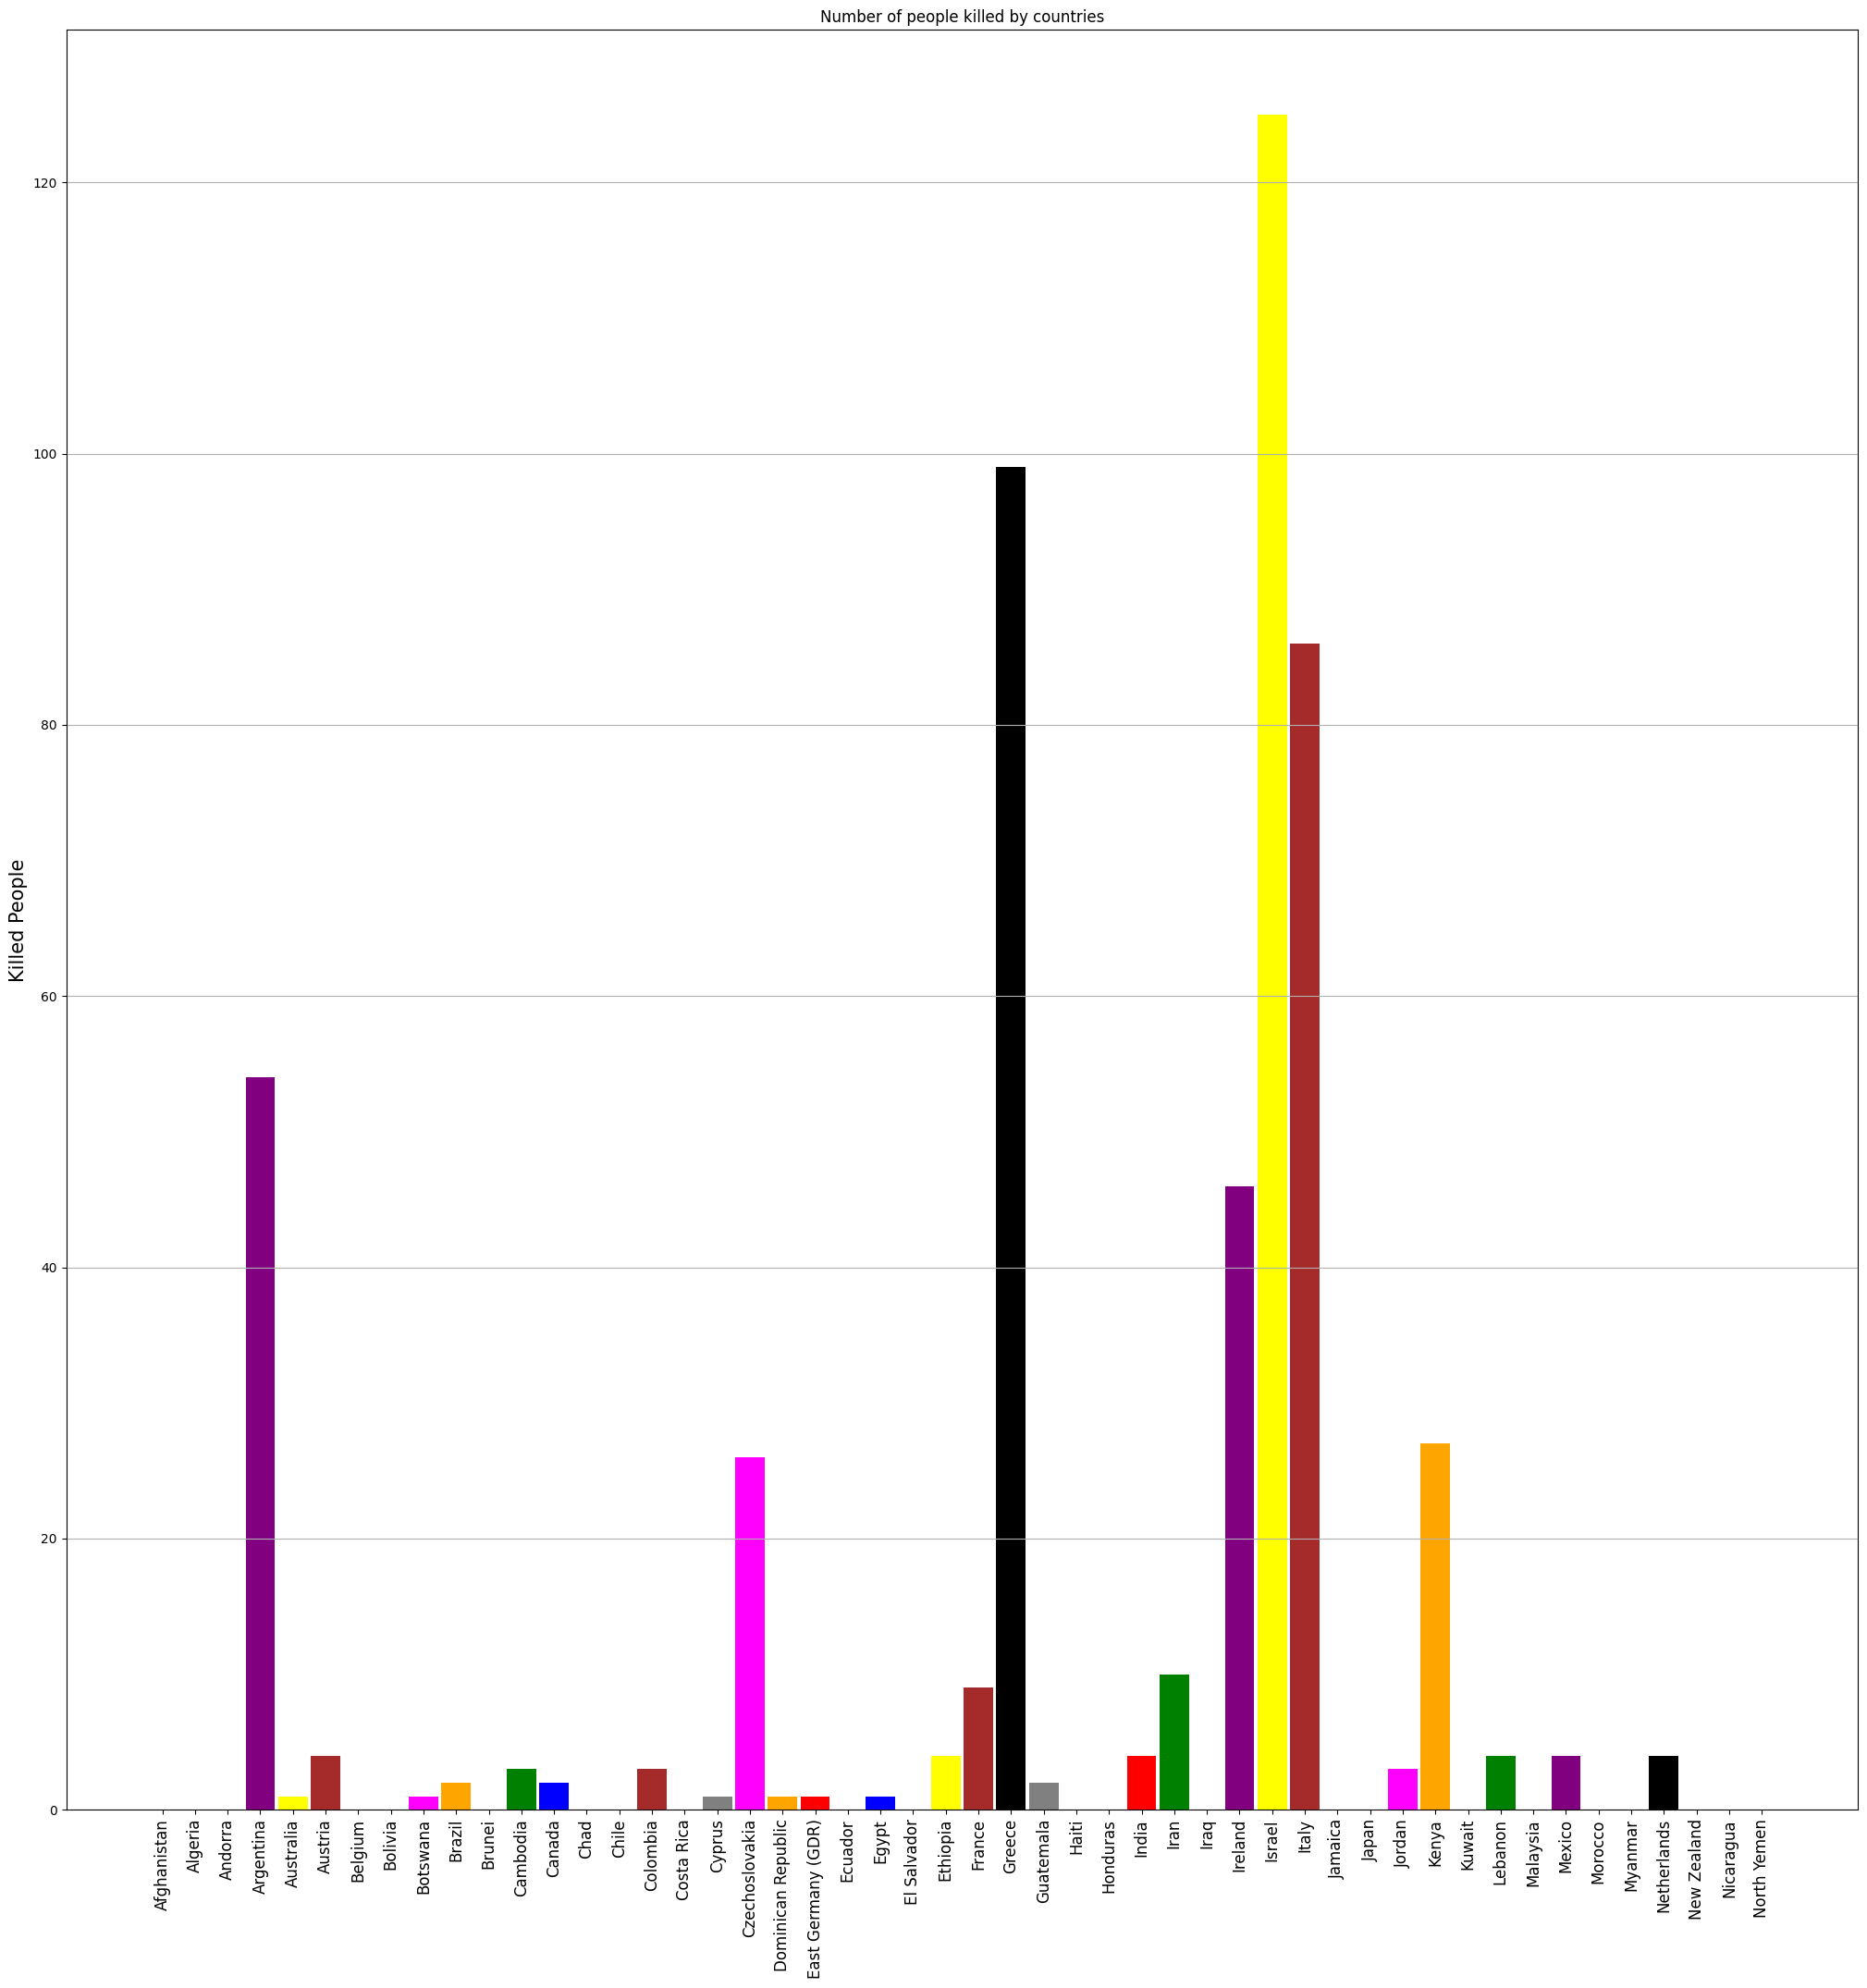

In [24]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
# print(fig_size)
plt.show()

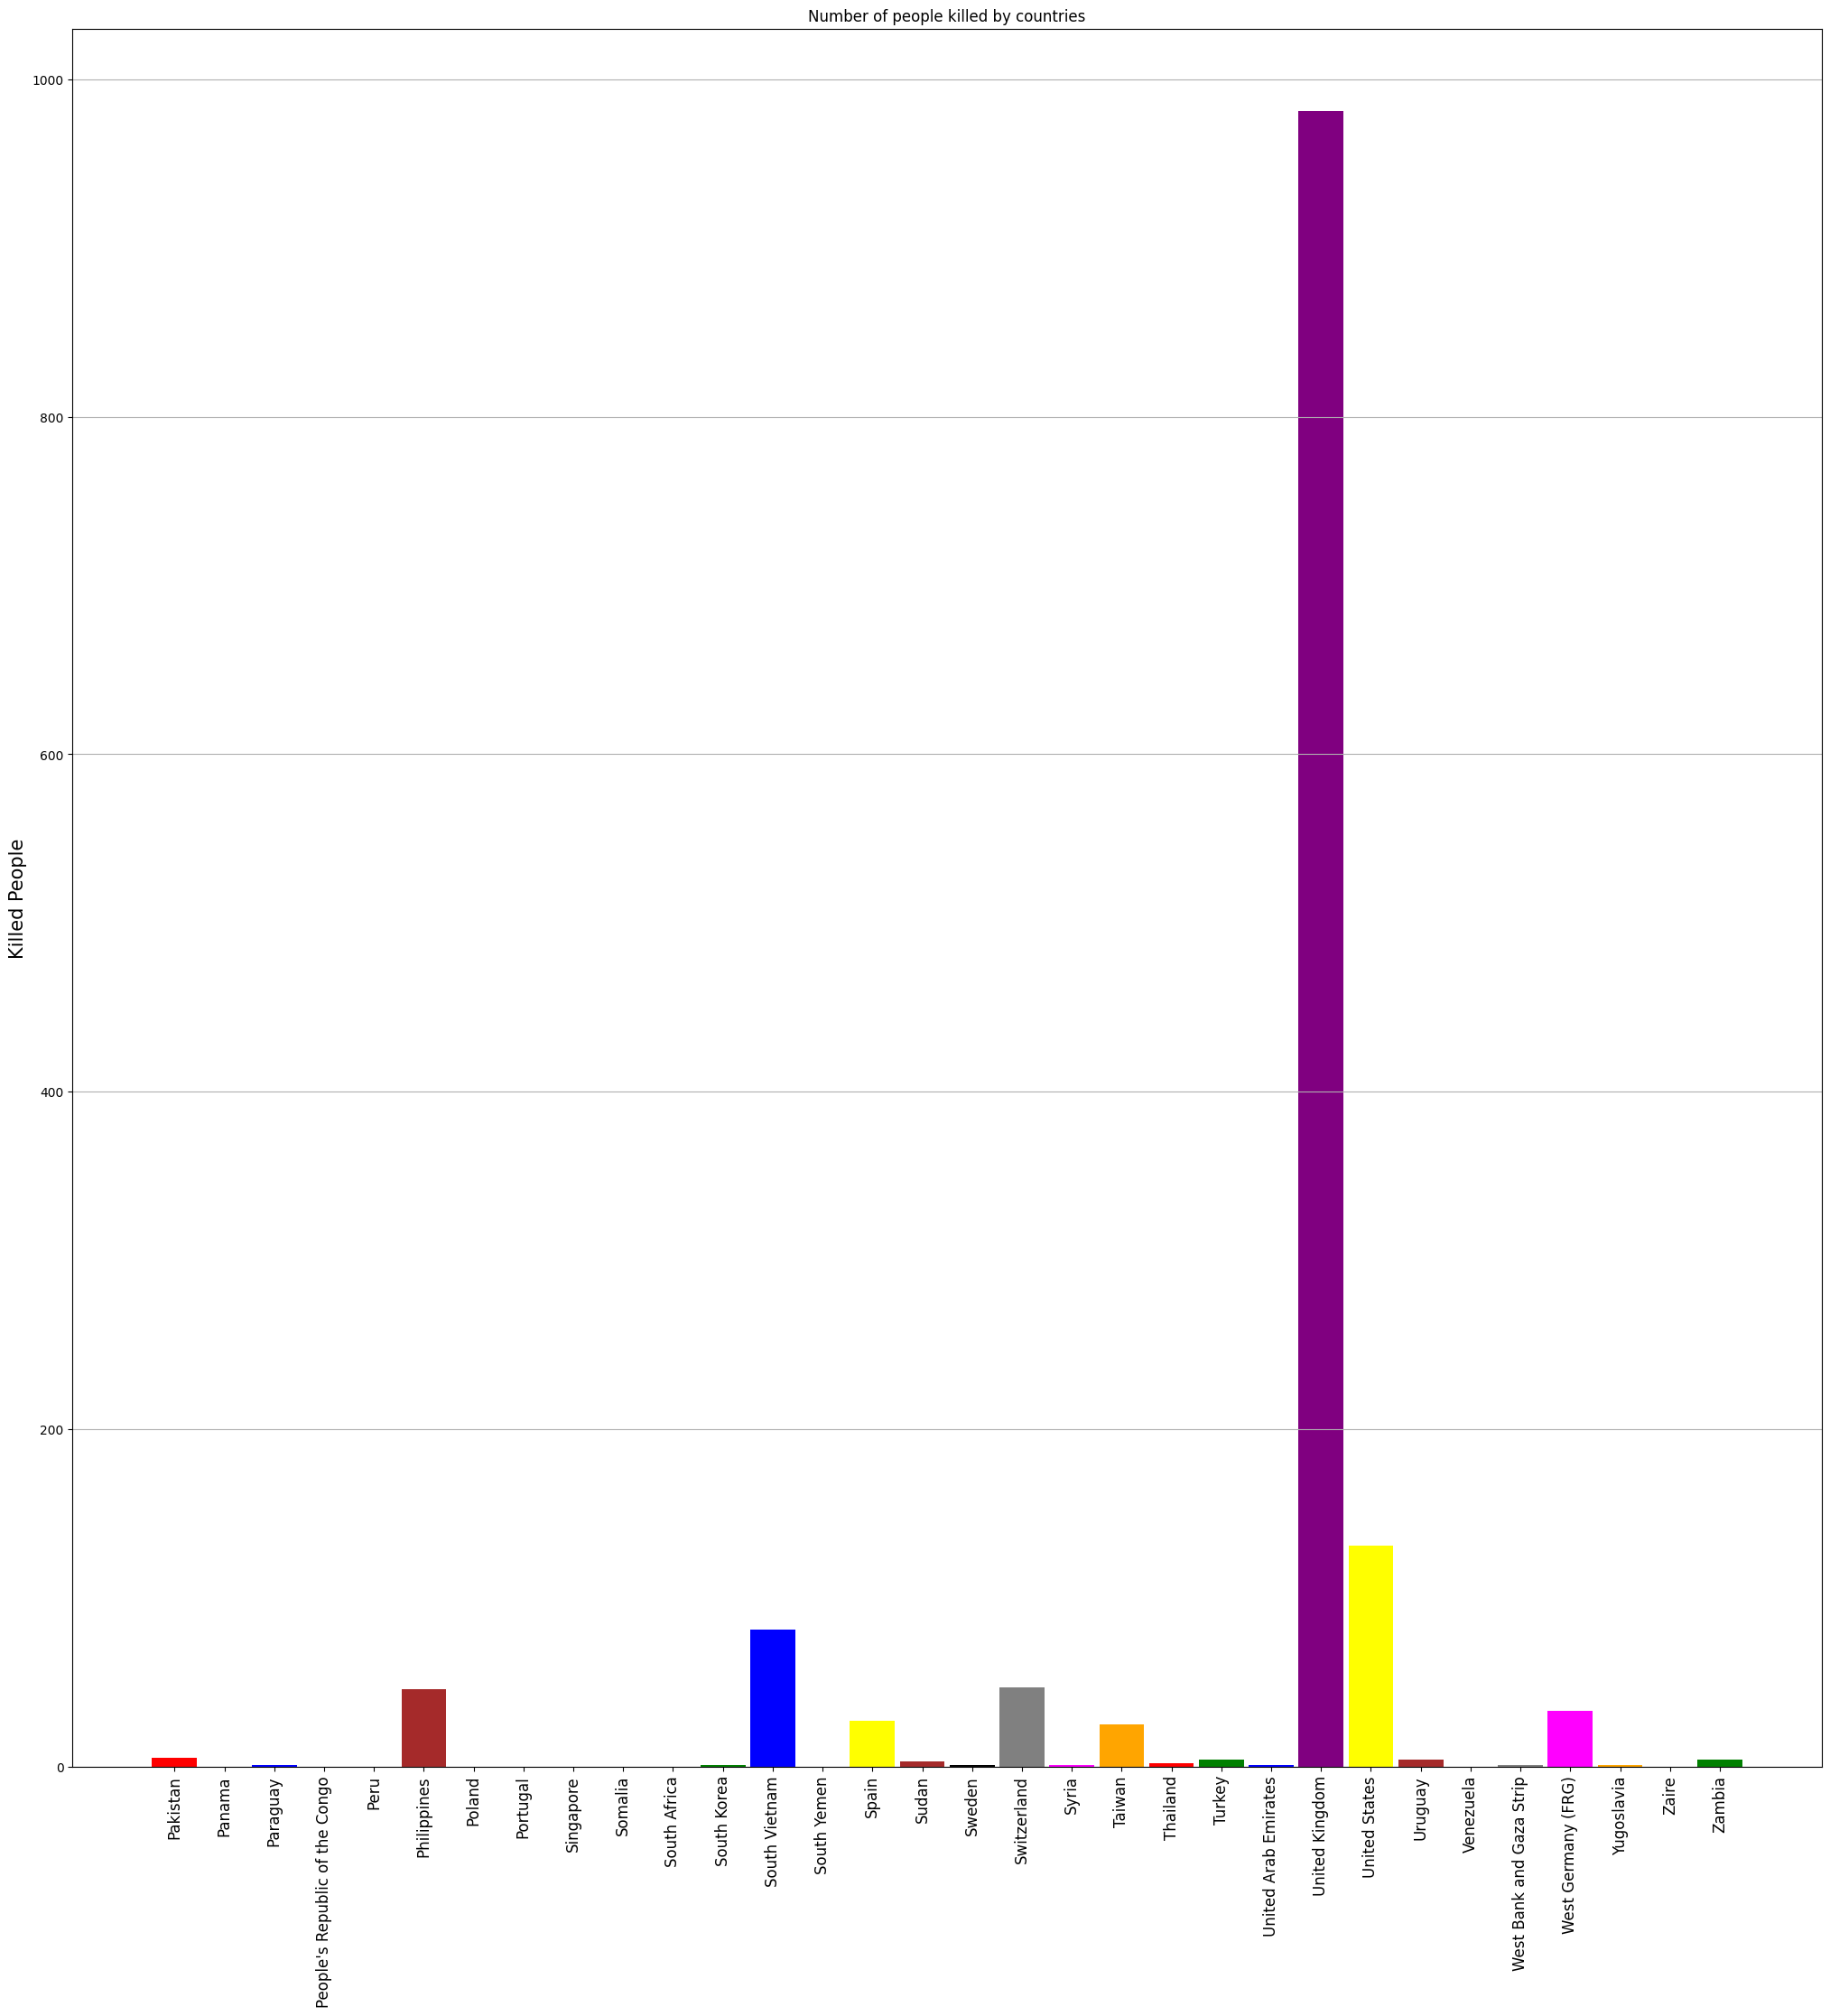

In [25]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
plt.show()

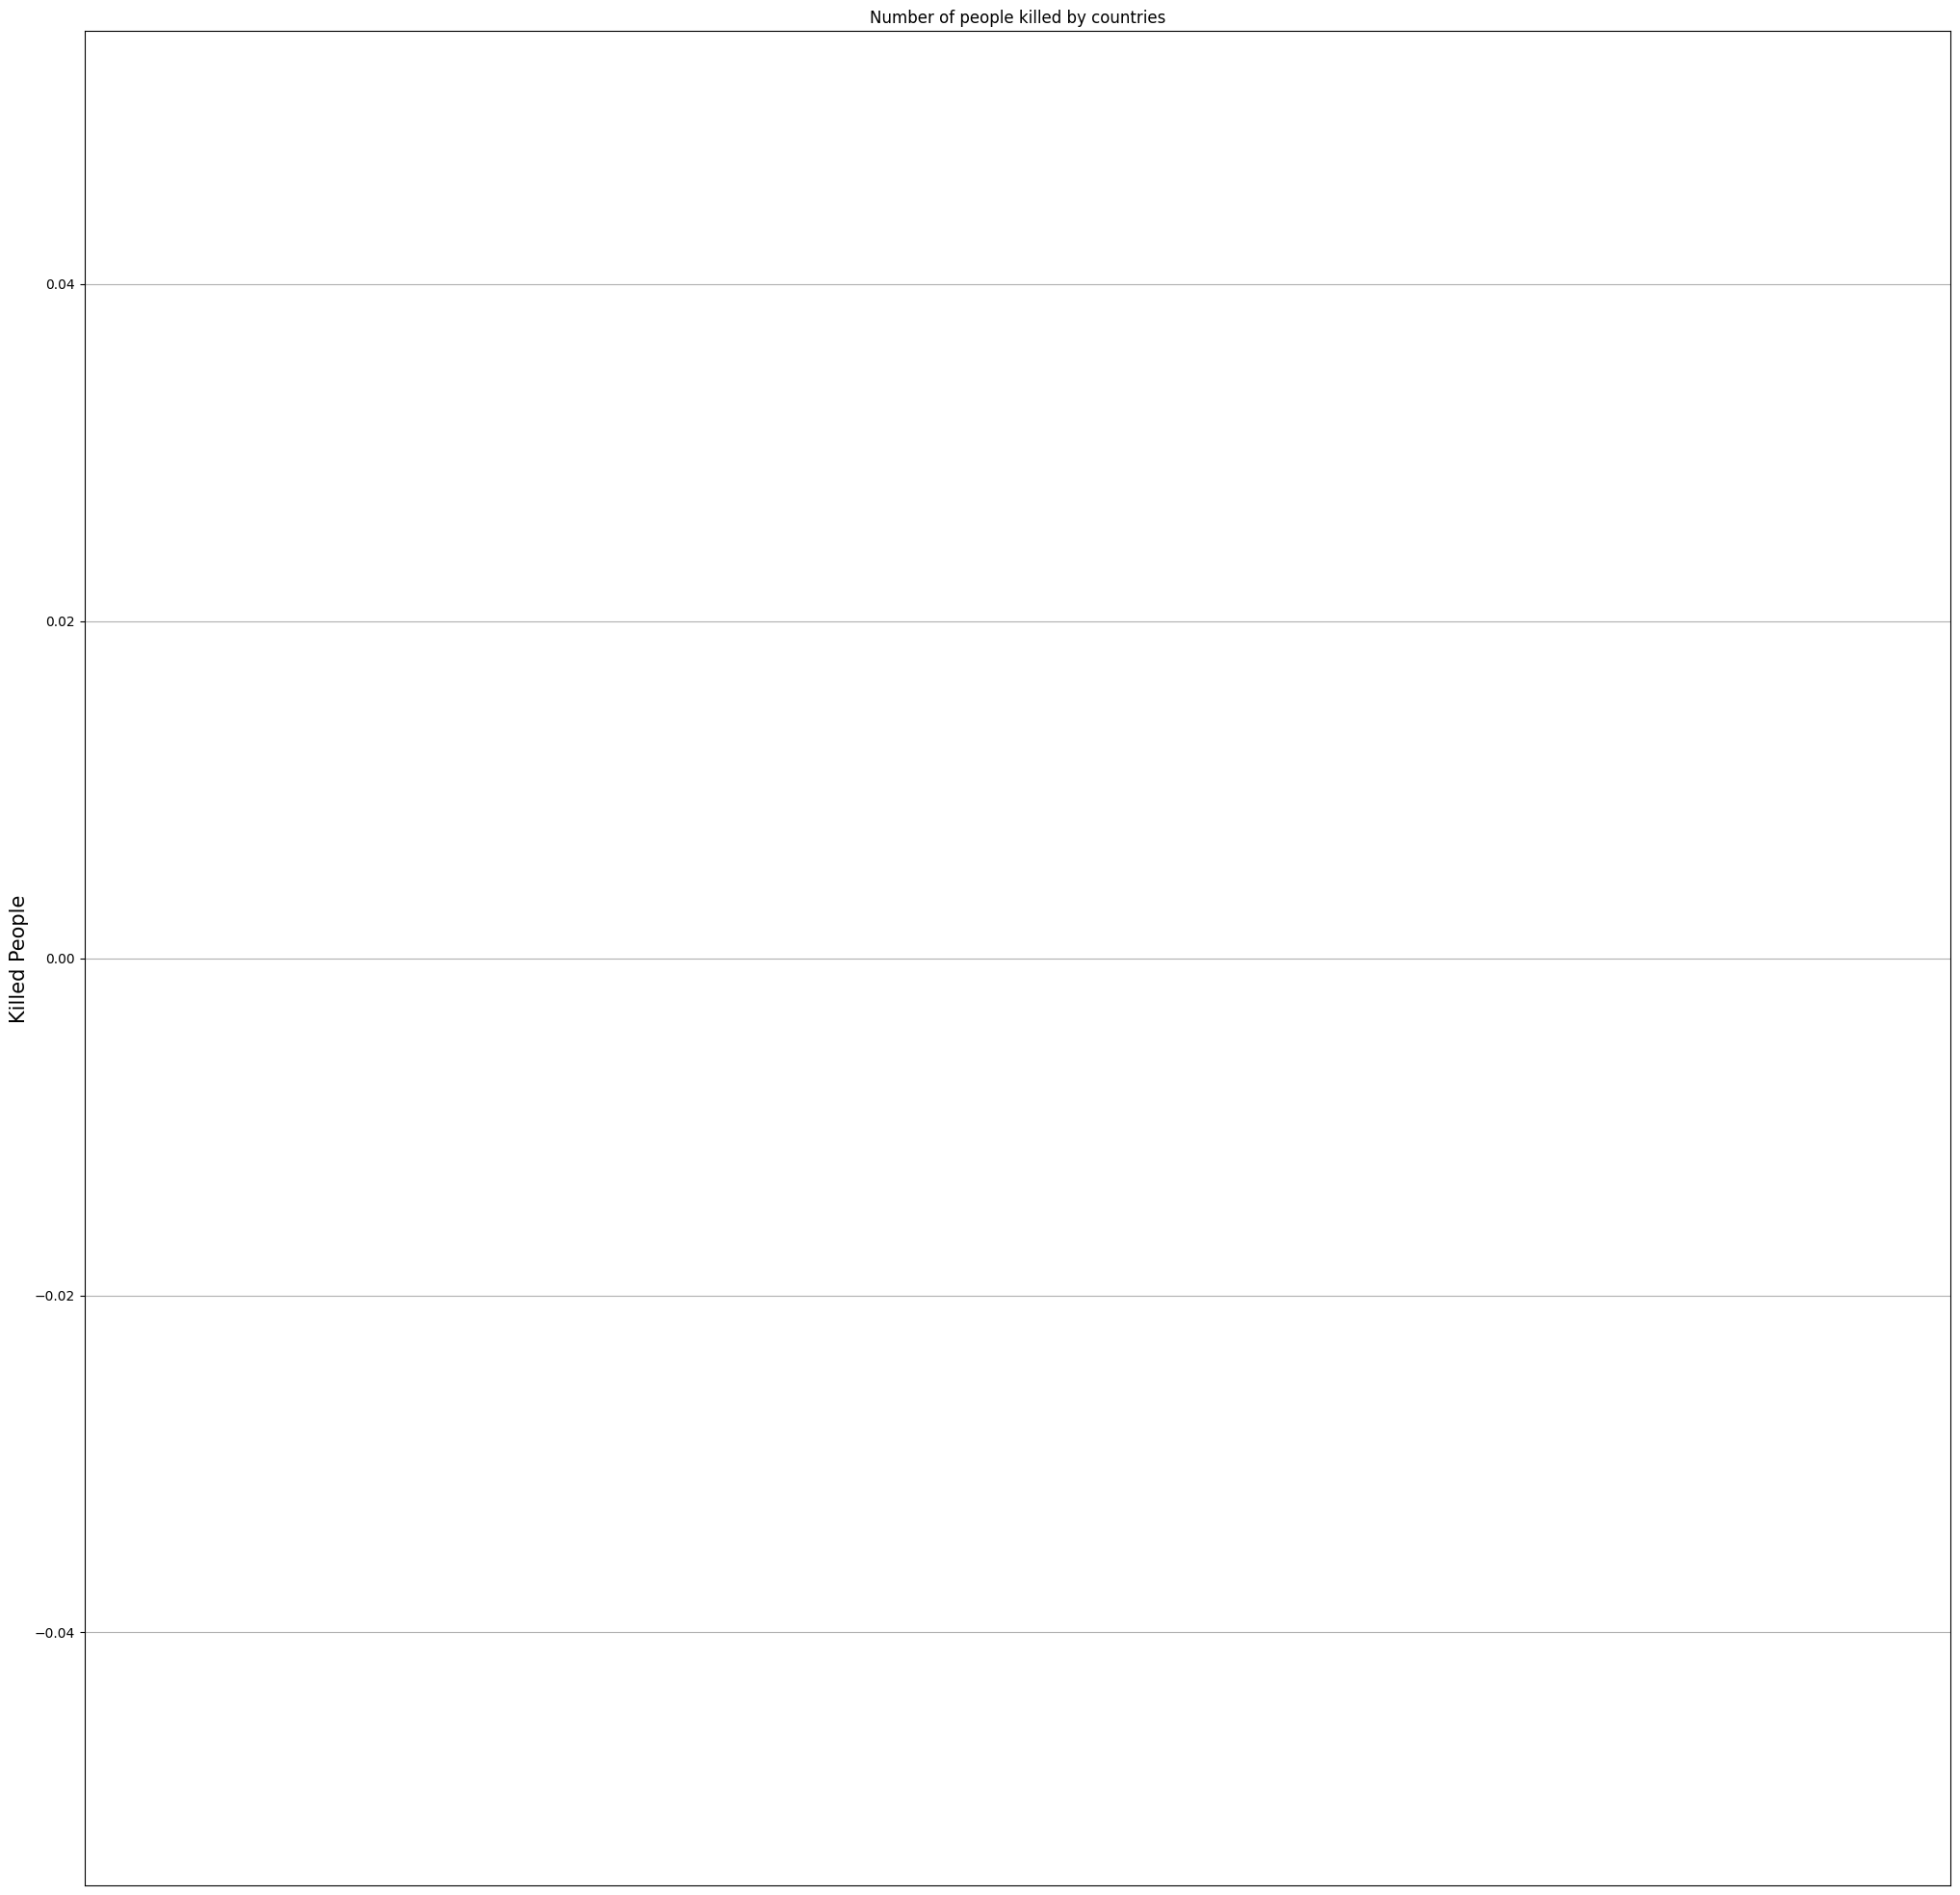

In [26]:
labels = countryKillFormatData.columns.tolist()
labels = labels[152:206]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
plt.show()